<a href="https://colab.research.google.com/github/Linzp828/IS6400/blob/MachineLearnning/predict_share_price_of_maotai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# predict share price of MaoTai
#### Author: Concyclics

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
%cd './drive/MyDrive/Colab Notebooks/IS6400'
os.listdir(os.getcwd())

/content/drive/MyDrive/Colab Notebooks/IS6400


['predict-share-price-of-maotai.ipynb', 'archive.zip', 'dataset']

In [3]:
# import zipfile

# with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
#     zip_ref.extractall('dataset')

## 1. Load MaoTai price

### 1.1 Load csv

In [4]:
import numpy as np
import pandas as pd

wine_ds = {}
ds_names = ['LUZHOU','WULIANG','YANGJIU','MAOTAI','SHANGXI']
for i, file in enumerate(os.listdir('./dataset')):
    data = pd.read_csv('./dataset/'+file, parse_dates=['date'])
    print("{} dataset is loaded".format(file))
    wine_ds[ds_names[i]] = data

000568.csv dataset is loaded
000858.csv dataset is loaded
002304.csv dataset is loaded
600519.csv dataset is loaded
600809.csv dataset is loaded


### 1.2 View csv

In [5]:
for d in wine_ds:
    print(d)
    data = wine_ds[d]
    print('rows:',data.shape[0])
    print('columns:',data.shape[1])

LUZHOU
rows: 6756
columns: 15
WULIANG
rows: 5782
columns: 15
YANGJIU
rows: 2992
columns: 15
MAOTAI
rows: 4974
columns: 15
SHANGXI
rows: 6842
columns: 15


In [6]:
LuZhou = wine_ds['LUZHOU']
print(LuZhou.head())
print(LuZhou.dtypes)

        date     code  name  closing price  highest price  lowest price  \
0 2022-02-28  '000568  泸州老窖         216.60         216.77        213.07   
1 2022-02-25  '000568  泸州老窖         215.30         217.00        213.00   
2 2022-02-24  '000568  泸州老窖         211.75         220.00        207.16   
3 2022-02-23  '000568  泸州老窖         222.45         222.96        219.12   
4 2022-02-22  '000568  泸州老窖         221.32         227.59        220.00   

   opening price  previous closing price change amount change rate  \
0         215.32                  215.30           1.3      0.6038   
1         214.00                  211.75          3.55      1.6765   
2         220.00                  222.45         -10.7     -4.8101   
3         221.34                  221.32          1.13      0.5106   
4         227.00                  227.69         -6.37     -2.7977   

   turnover rate    volume        amount   total value  circulation value  
0         0.2988   4376998  9.422059e+08  3.187518e+

### 1.3 preprocess dataset

In [7]:
def preprocess_ds(data, show_flag=True):
    new_data = data.copy(deep=True)
    new_data.drop('code',axis=1,inplace=True)
    new_data.drop('name',axis=1,inplace=True)
    # data['change amount'] = data['change amount'].apply(pd.to_numeric, errors='coerce').fillna(0.0)
    # data['change rate'] = data['change rate'].apply(pd.to_numeric, errors='coerce').fillna(0.0)
    new_data['change amount'] = new_data['change amount'].apply(pd.to_numeric, errors='coerce').fillna(method="ffill")
    new_data['change rate'] = new_data['change rate'].apply(pd.to_numeric, errors='coerce').fillna(method="ffill")
    new_data['volume'] = new_data['volume'].astype(float)
    new_data['date'] = pd.to_datetime(new_data['date'])
    new_data = new_data.sort_values(by='date')
    if show_flag:
        print(new_data.dtypes)
        print(new_data.head())
    return new_data

In [8]:
new_wines = {}
for i in wine_ds:
    new_wines[i] = preprocess_ds(wine_ds[i], show_flag=False)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# cm = sns.light_palette("red", as_cmap=True)
# MaoTai_ds.tail().style.background_gradient(cmap=cm)

## 2. Visualize the share

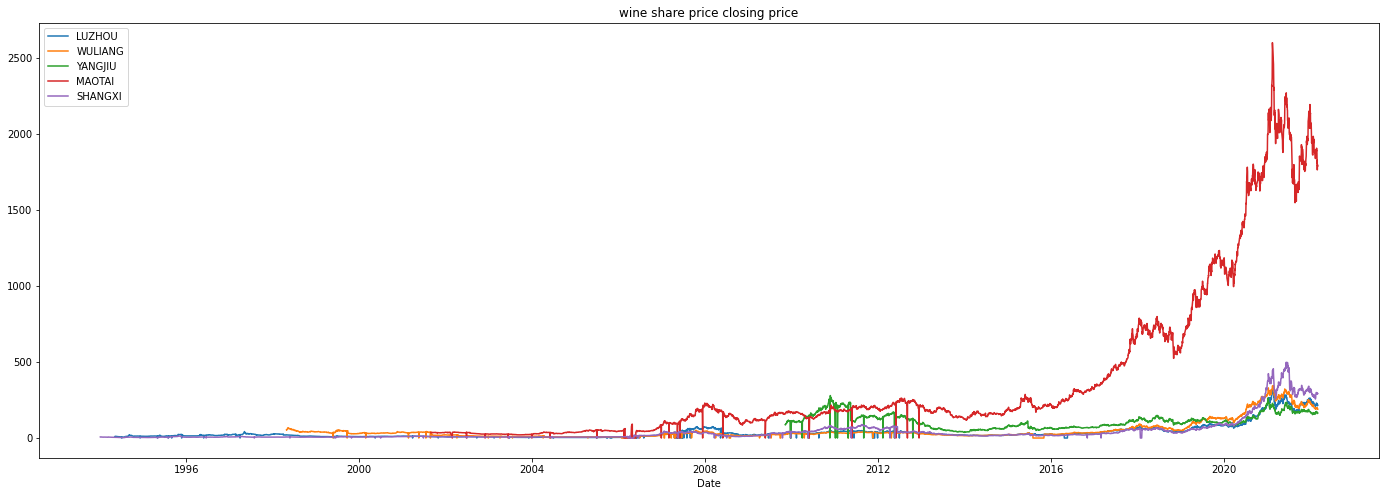

In [10]:
plt.figure(figsize=(24,8))
plt.title("wine share price closing price")
plt.xlabel("Date")
for i in new_wines:
    plt.plot(new_wines[i]['date'], new_wines[i]['closing price'], label=i)
    plt.legend()
plt.show()

我们可以看到茅台的股价从2016年起有明显的上升趋势，因此决定对2016年之后的数据进行探索

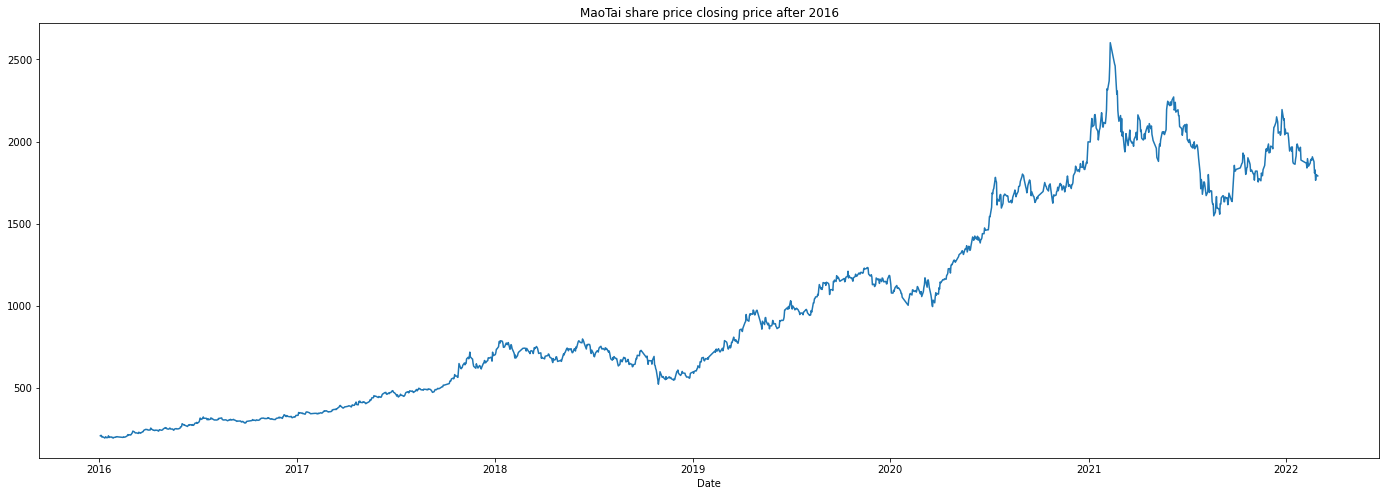

In [15]:
maotai = new_wines['MAOTAI'].copy(deep=True)
maotai2016 = maotai[maotai['date'].dt.year >= 2016]
plt.figure(figsize=(24,8))
plt.title("MaoTai share price closing price after 2016")
plt.xlabel("Date")
plt.plot(maotai2016['date'], maotai2016['closing price'])

In [21]:
def plot_wine(name, year):
    new_d = new_wines[name].copy(deep=True)
    new_d = new_d[new_d['date'].dt.year >= year]
    plt.figure(figsize=(24,8))
    plt.title(name+" share price closing price after "+ str(year))
    plt.xlabel("Date")
    plt.plot(new_d['date'], new_d['closing price'])

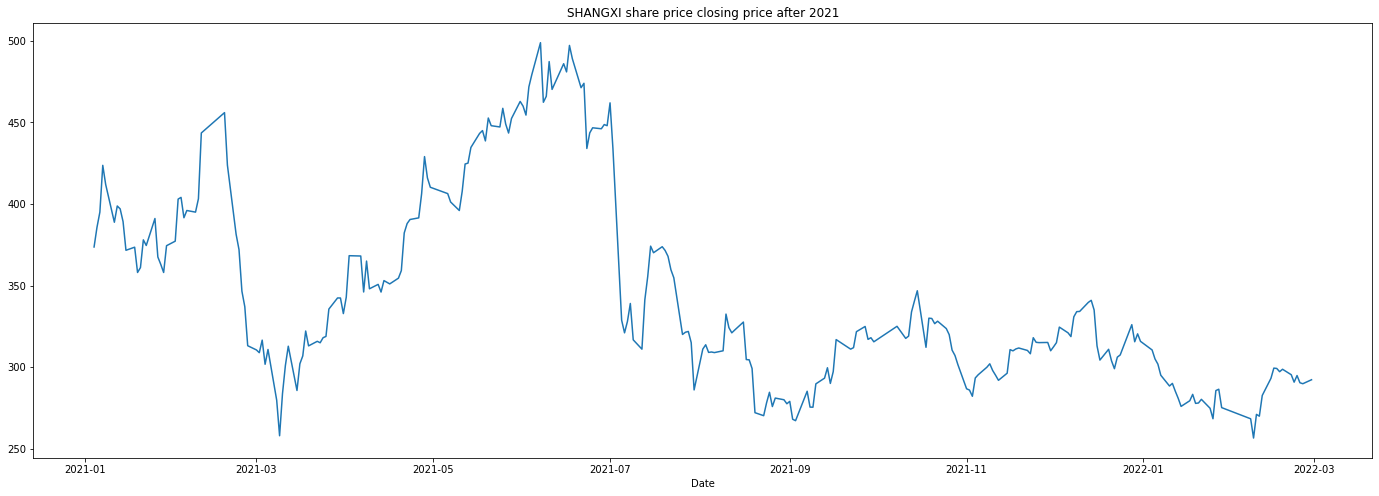

In [23]:
plot_wine('SHANGXI', 2021)

## 3. Train and test split